In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt

from utils.visualization import data_count_plot
from utils.duplicates import find_near_duplicates, visualize_duplicates, get_duplicates_to_delete

from utils import data

### Loading Dataframe

In [2]:
base_path = '../data/raw/Furniture_Data'
df = data.load(base_path)

Loading tables...
Loading tables/Eclectic...
Loading tables/Midcentury...
Loading tables/Craftsman...
Loading tables/Victorian...
Loading tables/Transitional...
Loading tables/Mediterranean...
Loading tables/Traditional...
Loading tables/Industrial...
Loading tables/Farmhouse...
Loading tables/Tropical...
Loading tables/Southwestern...
Loading tables/Beach...
Loading tables/Modern...
Loading tables/Contemporary...
Loading tables/Rustic...
Loading tables/Scandinavian...
Loading tables/Asian...
Loading sofas...
Loading sofas/Eclectic...
Loading sofas/Midcentury...
Loading sofas/Craftsman...
Loading sofas/Victorian...
Loading sofas/Transitional...
Loading sofas/Mediterranean...
Loading sofas/Traditional...
Loading sofas/Industrial...
Loading sofas/Farmhouse...
Loading sofas/Tropical...
Loading sofas/Southwestern...
Loading sofas/Beach...
Loading sofas/Modern...
Loading sofas/Contemporary...
Loading sofas/Rustic...
Loading sofas/Scandinavian...
Loading sofas/Asian...
Loading lamps...
Loadi

In [ ]:
df.describe()

In [ ]:
df.head()

### Histogram Plot

In [ ]:
def plot_histogram(df, column_name, bins=20, title=None):
    plt.figure(figsize=(10, 5))
    plt.hist(df[column_name], bins=bins, color='skyblue', edgecolor='black')
    plt.title(title or f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Plot histograms for numerical columns
plot_histogram(df, 'Width', title='Histogram of Image Widths')
plot_histogram(df, 'Height', title='Histogram of Image Heights')
plot_histogram(df, 'Ratio', title='Histogram of Image Ratios')

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

data_count_plot(df, 'Type', ax=ax[0][0], title='File Types', annotate=True, palette='Set2')
data_count_plot(df, 'Mode', ax=ax[0][2], title='Image Modes', annotate=True, palette='Accent')
data_count_plot(df, 'Class', ax=ax[1][1], horizontal=True, title='Classes', annotate=True, palette='Set1')
data_count_plot(df, 'Style', ax=ax[1][2], horizontal=True, title='Styles', annotate=True, palette='Set1')

fig.suptitle('Raw Dataset Statistics', fontsize=20, fontweight='bold', y=1.0)
fig.tight_layout()

---
## Duplicate handling

### Find all duplicates or similar images

In [10]:
duplicates = find_near_duplicates(df, threshold=1)
duplicates

Processing images: 100%|██████████| 90084/90084 [1:56:16<00:00, 12.91image/s, Duplicates=10659, Current=../data/raw/Furniture_Data/beds/Asian/8103asian-canopy-beds.jpg]                                           


,Duplicate_Group,First_Image_Path,Duplicate_or_Similar,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,1,tables/Eclectic/3901eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/3901eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
1,1,tables/Eclectic/3901eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/3952eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
2,2,tables/Eclectic/3776eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/3776eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
3,2,tables/Eclectic/3776eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/4036eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
4,3,tables/Eclectic/4068eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/4068eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
...,...,...,...,...,...,...,...,...,...,...,...
28221,10657,beds/Asian/7634asian-daybeds.jpg,Duplicate,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
28222,10658,beds/Midcentury/7894midcentury-platform-beds.jpg,Similar,beds/Midcentury/7894midcentury-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Midcentury
28223,10658,beds/Midcentury/7894midcentury-platform-beds.jpg,Similar,beds/Asian/7915asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian
28224,10659,beds/Asian/2709asian-platform-beds.jpg,Duplicate,beds/Asian/2709asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian


### Visualize duplicates images to test

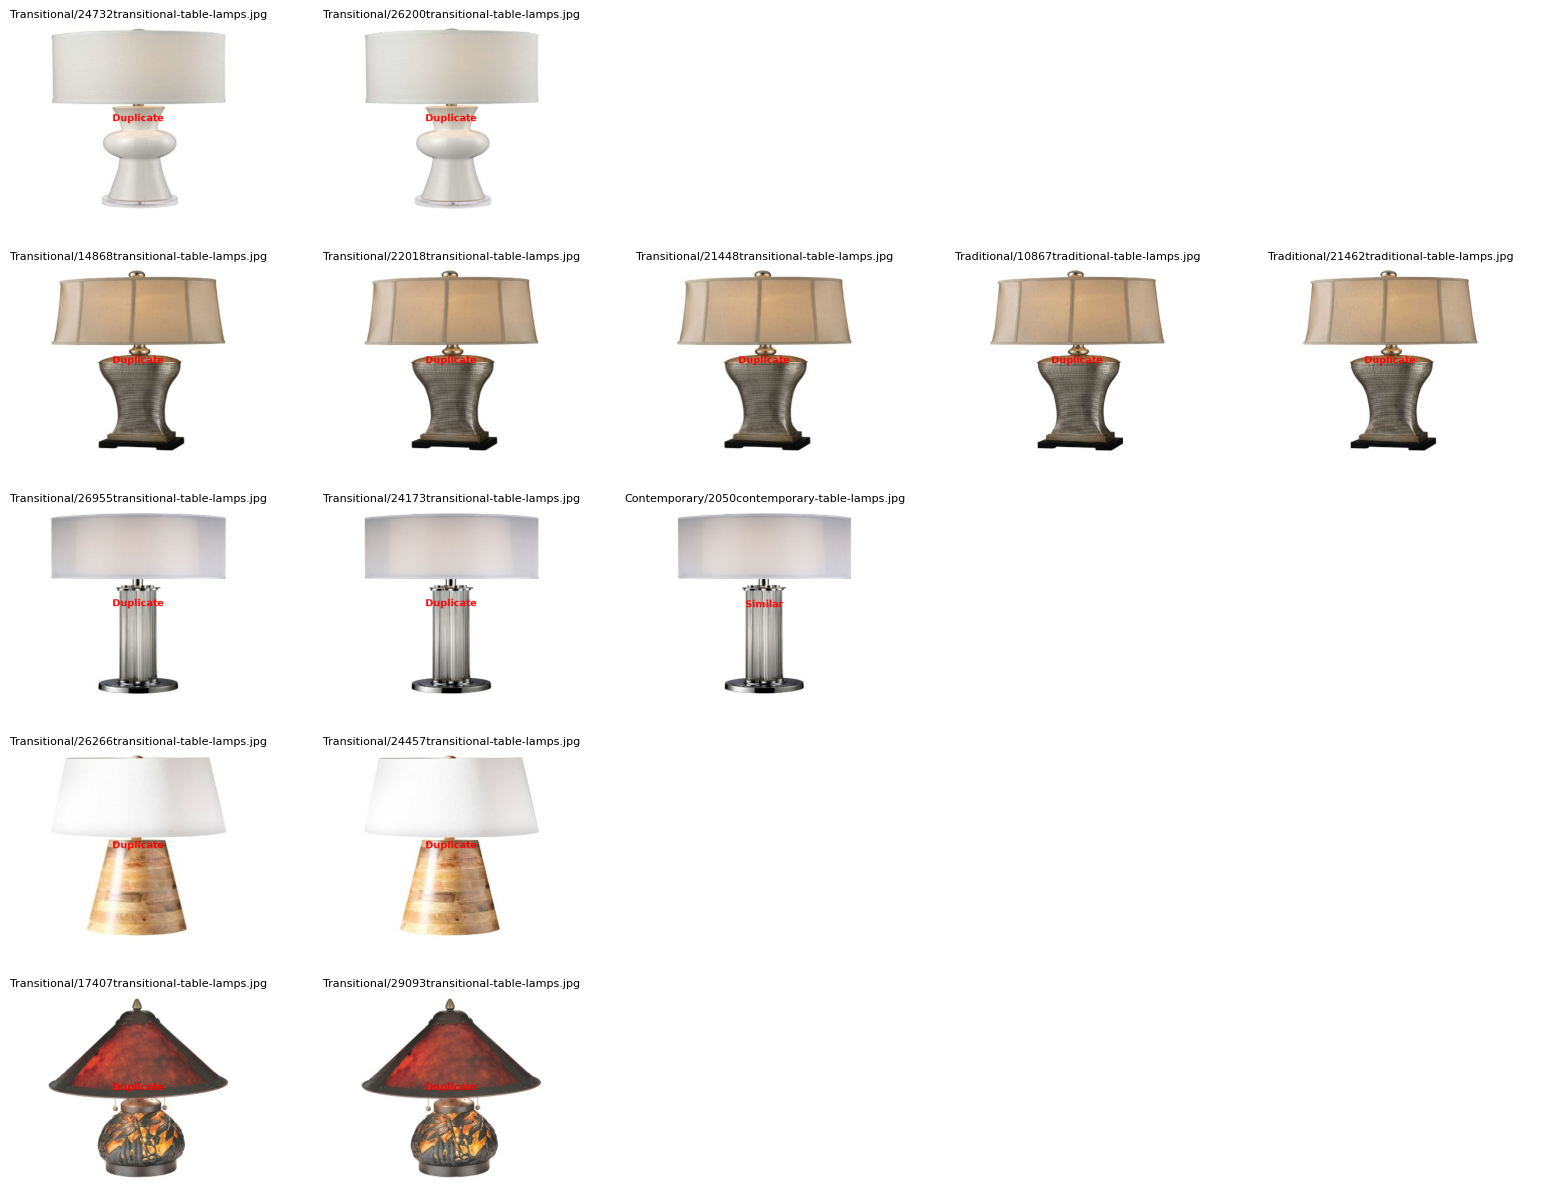

In [15]:
visualize_duplicates(duplicates, num_groups=5, start_group=2500)

### Get duplicates to be deleted 

- This only includes "Duplicate" images (and not "Similar" images). 
- 1 "Duplicate" image from a Duplicate Group will be kept (not included in the output of duplicate_to_delete()).

In [12]:
to_be_deleted = get_duplicates_to_delete(duplicates)
to_be_deleted

,Duplicate_Group,First_Image_Path,Duplicate_or_Similar,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,1,tables/Eclectic/3901eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/3952eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
1,2,tables/Eclectic/3776eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/4036eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
2,3,tables/Eclectic/4068eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/4911eclectic-coffee-and-accent...,jpg,350,350,1.0,RGB,tables,Eclectic
3,4,tables/Eclectic/3893eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/4018eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
4,5,tables/Eclectic/4071eclectic-side-tables-and-e...,Duplicate,tables/Eclectic/4041eclectic-side-tables-and-e...,jpg,350,350,1.0,RGB,tables,Eclectic
...,...,...,...,...,...,...,...,...,...,...,...
14174,10629,beds/Rustic/4754rustic-bed.jpg,Duplicate,beds/Rustic/8945rustic-panel-beds.jpg,jpg,224,224,1.0,RGB,beds,Rustic
14175,10654,beds/Asian/20750asian-comforters-and-comforter...,Duplicate,beds/Asian/3112asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian
14176,10655,beds/Asian/3413asian-platform-beds.jpg,Duplicate,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
14177,10657,beds/Asian/7634asian-daybeds.jpg,Duplicate,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian


## Delete duplicates

In [8]:
# Uncomment below
# df = df[~df['Path'].isin(images_to_delete['Path'])]


In [20]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Group the DataFrame by 'Duplicate_Group' and count the unique 'Class' values
group_counts = duplicates.groupby('Duplicate_Group')['Class'].nunique()

# Get the 'Duplicate_Group' values where there are different 'Class' values
groups_with_different_classes = group_counts[group_counts > 1].index

# Filter the original DataFrame to include only the rows with 'Duplicate_Group' values
# that have different 'Class' values
result_df = duplicates[duplicates['Duplicate_Group'].isin(groups_with_different_classes)]

# Check if there are any rows in the resulting DataFrame
if len(result_df) > 0:
    print("The following rows have the same 'Duplicate_Group' but different 'Class':")
    print(result_df)
else:
    print("All rows with the same 'Duplicate_Group' have the same 'Class'.")

The following rows have the same 'Duplicate_Group' but different 'Class':
       Duplicate_Group                                   First_Image_Path  \
1842               789          sofas/Midcentury/1848midcentury-sofas.jpg   
1843               789          sofas/Midcentury/1848midcentury-sofas.jpg   
1844               789          sofas/Midcentury/1848midcentury-sofas.jpg   
1847               791          sofas/Midcentury/1402midcentury-sofas.jpg   
1848               791          sofas/Midcentury/1402midcentury-sofas.jpg   
1849               791          sofas/Midcentury/1402midcentury-sofas.jpg   
19375             7436  tables/Modern/10363modern-nightstands-and-beds...   
19376             7436  tables/Modern/10363modern-nightstands-and-beds...   
21616             8428      sofas/Transitional/4509transitional-sofas.jpg   
21617             8428      sofas/Transitional/4509transitional-sofas.jpg   
21618             8429       sofas/Contemporary/936contemporary-sofas.jpg   
21

In [21]:
result_df

,Duplicate_Group,First_Image_Path,Duplicate_or_Similar,Path,Type,Width,Height,Ratio,Mode,Class,Style
1842,789,sofas/Midcentury/1848midcentury-sofas.jpg,Duplicate,sofas/Midcentury/1848midcentury-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Midcentury
1843,789,sofas/Midcentury/1848midcentury-sofas.jpg,Duplicate,sofas/Midcentury/1876midcentury-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Midcentury
1844,789,sofas/Midcentury/1848midcentury-sofas.jpg,Duplicate,chairs/Midcentury/20530midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury
1847,791,sofas/Midcentury/1402midcentury-sofas.jpg,Duplicate,sofas/Midcentury/1402midcentury-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Midcentury
1848,791,sofas/Midcentury/1402midcentury-sofas.jpg,Duplicate,sofas/Midcentury/4020midcentury-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Midcentury
1849,791,sofas/Midcentury/1402midcentury-sofas.jpg,Duplicate,chairs/Midcentury/17520midcentury-armchairs-an...,jpg,350,350,1.0,RGB,chairs,Midcentury
19375,7436,tables/Modern/10363modern-nightstands-and-beds...,Similar,tables/Modern/10363modern-nightstands-and-beds...,jpg,350,350,1.0,RGB,tables,Modern
19376,7436,tables/Modern/10363modern-nightstands-and-beds...,Similar,lamps/Contemporary/4023contemporary-table-lamp...,jpg,350,350,1.0,RGB,lamps,Contemporary
21616,8428,sofas/Transitional/4509transitional-sofas.jpg,Similar,sofas/Transitional/4509transitional-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Transitional
21617,8428,sofas/Transitional/4509transitional-sofas.jpg,Similar,chairs/Eclectic/5037eclectic-armchairs-and-acc...,jpg,350,350,1.0,RGB,chairs,Eclectic


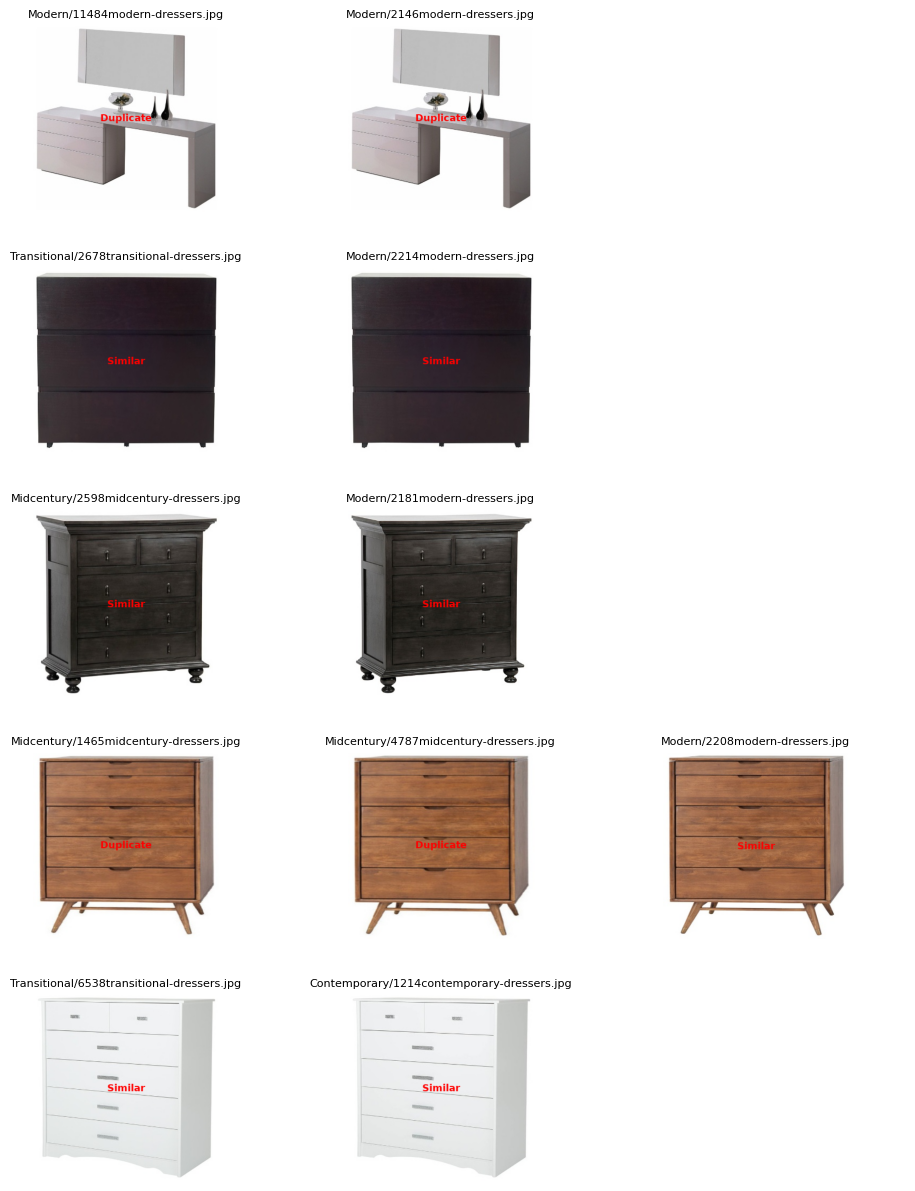

In [43]:
visualize_duplicates(duplicates, num_groups=5, start_group=10266)

In [35]:
filtered_result_df = result_df[result_df['Path'].str.contains('2146')]
filtered_result_df

,Duplicate_Group,First_Image_Path,Duplicate_or_Similar,Path,Type,Width,Height,Ratio,Mode,Class,Style
27401,10266,tables/Modern/11484modern-dressers.jpg,Duplicate,dressers/Modern/2146modern-dressers.jpg,jpg,350,350,1.0,RGB,dressers,Modern


In [44]:
duplicates.to_csv('duplicates.csv', index=False)